#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
## Reading the image plaksha_Faculty.jpg
## Convert the image to grayscale
img = cv2.imread('plaksha_Faculty.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0, 0, 255)  # Red color
font_thickness = 1

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-5), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of faces detected: {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


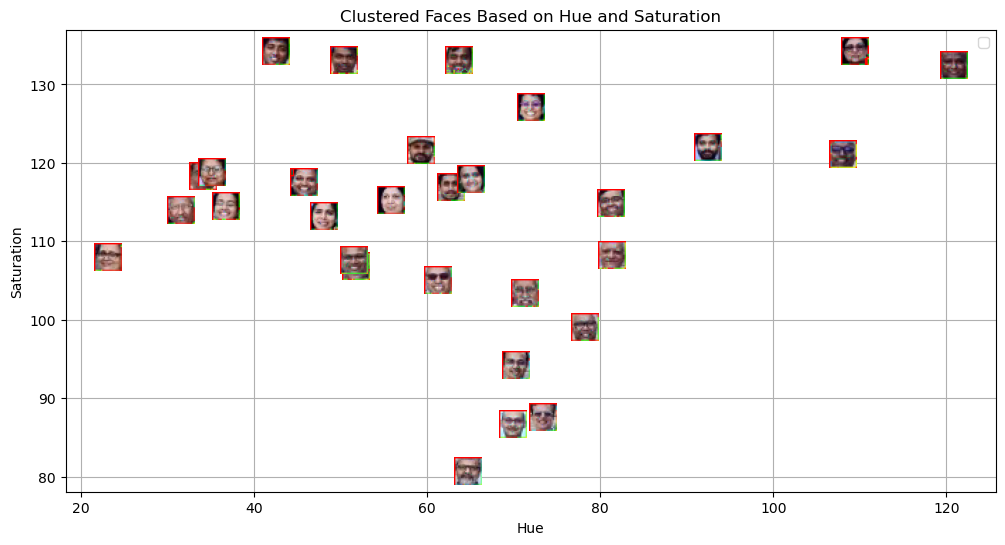

In [4]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_saturation = []
face_images = []

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Faces Based on Hue and Saturation")
plt.grid()
plt.legend()
plt.show()

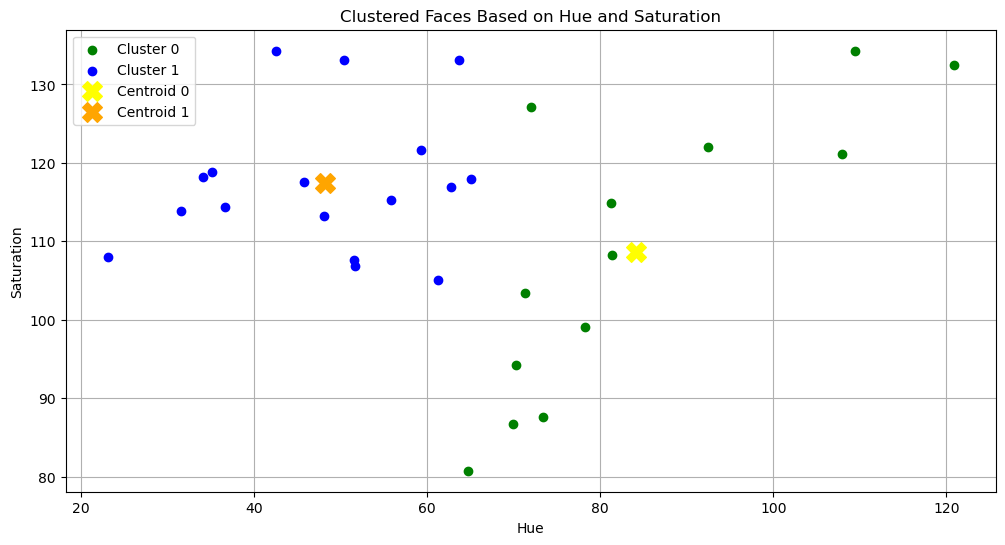

In [7]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]
plt.scatter(centroid_0[0], centroid_0[1], color='yellow', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='orange', marker='X', s=200, label='Centroid 1')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Faces Based on Hue and Saturation")
plt.legend()
plt.grid()
plt.show()

In [5]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.05, minNeighbors=4)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Template Image Face Detection", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

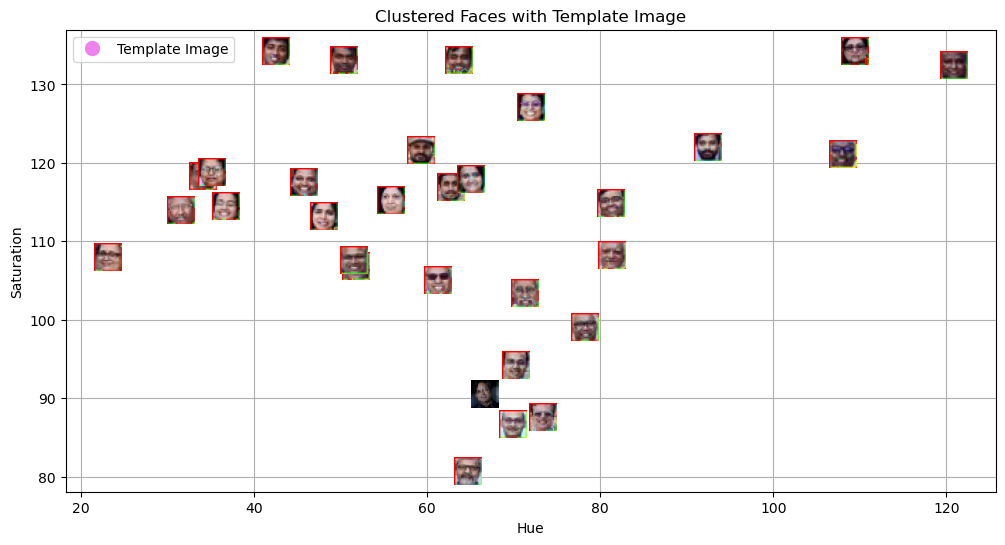

In [6]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.plot(template_hue, template_saturation, 'o', markersize=10, color='violet', label='Template Image')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Faces with Template Image")
plt.grid()
plt.legend()
plt.show()

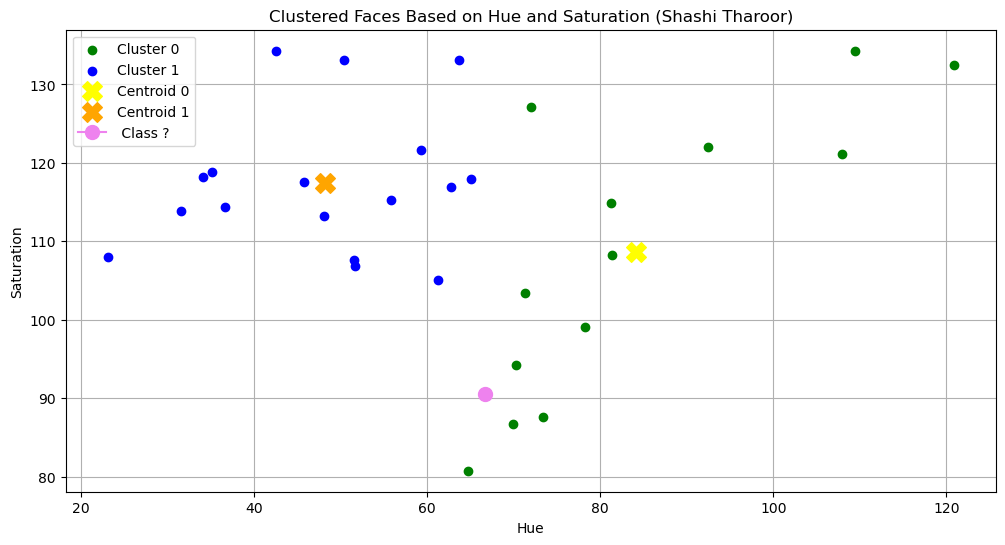

In [8]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = centroids[0]
centroid_1 = centroids[1]
plt.scatter(centroid_0[0], centroid_0[1], color='yellow', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='orange', marker='X', s=200, label='Centroid 1')
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

# Labels and grid
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Faces Based on Hue and Saturation (Shashi Tharoor)")
plt.legend()
plt.grid()
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

1) **Common Distance Metrics in Distance-Based Classification Algorithms**

Distance-based classification algorithms, such as k-Nearest Neighbors (KNN), rely on various distance metrics to measure similarity between data points. The most common distance metric is Euclidean distance, which calculates the straight-line distance between two points in a multidimensional space. Manhattan distance (or city block distance) sums the absolute differences along each dimension, making it useful for grid-like structures. Minkowski distance generalizes both Euclidean and Manhattan distances by adjusting the power parameter. Cosine similarity measures the angle between two vectors, commonly used in text classification. Mahalanobis distance accounts for correlations between features and scales distances based on variance, making it effective in high-dimensional data.

2) **Real-World Applications of Distance-Based Classification Algorithms**

Distance-based classification algorithms have numerous real-world applications across different domains. In healthcare, KNN is used for disease prediction and medical diagnosis based on patient symptoms and historical data. Image recognition systems classify objects based on pixel intensity similarity. In fraud detection, distance-based approaches identify anomalies in transaction patterns. Recommender systems utilize similarity metrics to suggest products, movies, or songs based on user preferences. Additionally, in biometrics, facial recognition algorithms classify individuals by comparing facial feature distances.

3) **Explanation of Various Distance Metrics**

Different distance metrics serve various purposes depending on the data type and application. Euclidean distance is widely used for continuous numerical data as it directly measures the shortest path between points. Manhattan distance is effective in cases where movement is restricted to grid paths, such as in urban planning. Minkowski distance is a generalized form that can mimic either Euclidean or Manhattan distances based on its parameter. Cosine similarity is suitable for high-dimensional vector spaces, such as document classification, where magnitudes vary but direction matters. Mahalanobis distance is particularly useful when data points are correlated, normalizing distances based on variance to improve classification accuracy.

4) **Role of Cross-Validation in Model Performance**

Cross-validation is a crucial technique to assess and improve the performance of machine learning models by reducing overfitting and ensuring robustness. In k-fold cross-validation, the dataset is split into multiple folds, where each subset is used for training and validation in different iterations, providing a more reliable estimate of model accuracy. This helps in hyperparameter tuning, such as selecting the optimal value of k in KNN. Cross-validation also ensures that the model generalizes well to unseen data, preventing bias from any particular subset of training data and leading to more reliable performance evaluation.

5) **Variance and Bias in Terms of KNN**

In KNN, bias refers to how much the model's predictions deviate from the actual data patterns. A small k (e.g., k=1) results in low bias because the model closely follows the training data, but it may lead to high variance, meaning it is overly sensitive to small changes and prone to overfitting. Conversely, a large k increases bias as the model becomes more generalized, leading to underfitting, but reduces variance since predictions are less affected by individual data points. Finding an optimal k is essential to maintain a balance between bias and variance for improved model accuracy.